
# [TEST] - APIs


## 0. Configuración

In [1]:
import sys
import os
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
sys.path.append('../scripts')

In [3]:
# Configuración de estilo
plt.style.use('ggplot')
sns.set_palette("husl")

In [4]:
from project_config import ProjectConfig as cfg


## 1. APIs

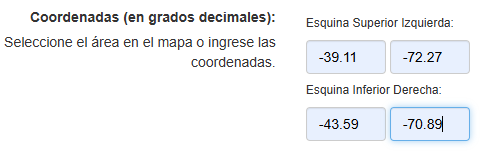


###  OpenMeteo


CHANGELOG:

- 14/09/2025 - La API de OpenMeteo está funcional, no volver a tocar el código. La única excepción será la de modificar la respuseta en base a los datos que se están obteniendo.

In [ ]:
from openmeteo_tools import OpenMeteoWeather

fetcher = OpenMeteoWeather()
df_clima = fetcher.get_meteorological_data(cfg.START_DATE, cfg.END_DATE, cfg.BBOX)

# También guardar en data/processed
df_clima.to_csv(f"{cfg.DATA_RAW}/open_meteo/om_{cfg.START_DATE}_{cfg.END_DATE}_{datetime.datetime.now().strftime('%Y%m%d')}.csv", index=False)

print("✅ Datos obtenidos exitosamente!")
print("💾 Datos guardados exitosamente!")
print(f"📊 Dimensiones: {df_clima.shape}")
print(f"📋 Columnas: {list(df_clima.columns)}")

print("\n📅 Rango temporal:")
print(f"   Inicio: {df_clima['date'].min()}")
print(f"   Fin: {df_clima['date'].max()}")

print("\n🔍 Primeras filas:")
display(df_clima.head())

print("\n📈 Estadísticas descriptivas:")
display(df_clima.describe())


### Climate Data Store (CDS) - Copernicus


CHANGELOG:

- 14/09/2025 - La API de OpenMeteo está funcional, no volver a tocar el código. La única excepción será la de modificar la respuseta en base a los datos que se están obteniendo.

In [5]:
from cds_tools import CDSTools

cds = CDSTools()

variables = [
    "2m_temperature",
    "2m_dewpoint_temperature",
    "total_precipitation",
    "surface_pressure",
    "10m_u_component_of_wind",
    "10m_v_component_of_wind"
]

# Obtener datos de temperatura
data = cds.get_climate_data(
    start_date="2024-12-20",
    end_date="2024-12-29",
    latitude=-41.422539,
    longitude=-73.123123,
    # dataset="reanalysis-era5-single-levels",
    variable="2m_temperature",
    radius=0.5,
)

2025-09-14 16:49:12,685 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-14 16:49:12,685 - ecmwf.datastores.legacy_client - INFO - [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-14 16:49:12,689 - cds_tools - INFO - Cliente CDS inicializado correctamente
2025-09-14 16:49:12,695 - cds_tools - INFO - Rango de fechas validado: 2024-12-20 a 2024-12-29
2025-09-14 16:49:12,698 - cds_tools - INFO - Parámetros de solicitud construidos para área: -40.922539N, -73.623123W, -41.922539S, -72.623123E
2025-09-14 16:49:12,700 - cds_tools - INFO - Rango temporal: 2024-12-20 a 2024-12-29
2025-09-14 16:49:12,702 - cds_tools - INFO - Iniciando descarga de datos para 2m_temperature...
2025-09-14 16:49:12,703 - cds_tools - INFO - Parámetros de la solicitud: {'product_type': 'reanalysis', 'variable': '2m_temperature', 'year': ['2024'], 'month': ['12'

acb814b4b8b69cd18993a8f54a552806.nc:   0%|          | 0.00/50.1k [00:00<?, ?B/s]

2025-09-14 16:49:31,445 - cds_tools - INFO - Datos descargados correctamente en: C:\Repositorios\199 - Seminario Final\data\raw\copernicus\reanalysis-era5-single-levels_2024-12-20_2024-12-29_-41.422539_-73.123123.netcdf
2025-09-14 16:49:31,445 - cds_tools - INFO - Procesando archivo NetCDF: C:\Repositorios\199 - Seminario Final\data\raw\copernicus\reanalysis-era5-single-levels_2024-12-20_2024-12-29_-41.422539_-73.123123.netcdf
2025-09-14 16:49:31,637 - cds_tools - INFO - Datos procesados guardados en: ..\data\raw\copernicus\reanalysis-era5-single-levels_2024-12-20_2024-12-29_-41.422539_-73.123123.csv


In [6]:
from copernicus_tools import CopernicusTools

copernicus = CopernicusTools(cfg)

file = copernicus.get_meteorological_data('levels')

df_clima = file.to_dataframe().reset_index()
df_clima.to_csv(f"{cfg.DATA_RAW}/copernicus/{cfg.START_DATE}_{cfg.END_DATE}_{datetime.datetime.now().strftime('%Y%m%d')}.csv", index=False)

2025-09-14 16:49:37,902 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-14 16:49:37,902 - ecmwf.datastores.legacy_client - INFO - [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-14 16:49:37,905 - copernicus_tools - INFO - Iniciando descarga de datos ERA5-Levels: ['2m_temperature', 'snow_depth', '10m_u_component_of_wind', '10m_v_component_of_wind', 'surface_pressure', 'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation']
2025-09-14 16:49:39,215 INFO Request ID is 86edb794-33a8-4414-b2b7-e28820162ab3
2025-09-14 16:49:39,215 - ecmwf.datastores.legacy_client - INFO - Request ID is 86edb794-33a8-4414-b2b7-e28820162ab3
2025-09-14 16:49:39,512 INFO status has been updated to accepted
2025-09-14 16:49:39,512 - ecmwf.datastores.legacy_client - INFO - status has been updated to accepted
2025-09-14 16:49:48,750 INFO status 

4cedbdfe8378d1c69b29aaadc30d5510.grib:   0%|          | 0.00/587k [00:00<?, ?B/s]

2025-09-14 16:49:57,428 - copernicus_tools - INFO - Datos descargados exitosamente: C:\Repositorios\199 - Seminario Final\data\raw\copernicus\era5_levels_2024-11-01_2025-03-31.nc
C:\Users\Ezequiel\AppData\Roaming\Python\Python313\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode the variable 'step' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
2025-09-14 16:50:02,362 - copernicus_tools - INFO - Archivo cargado con engine cfgrib: C:\Repositorios\19


### FIRMS - NASA

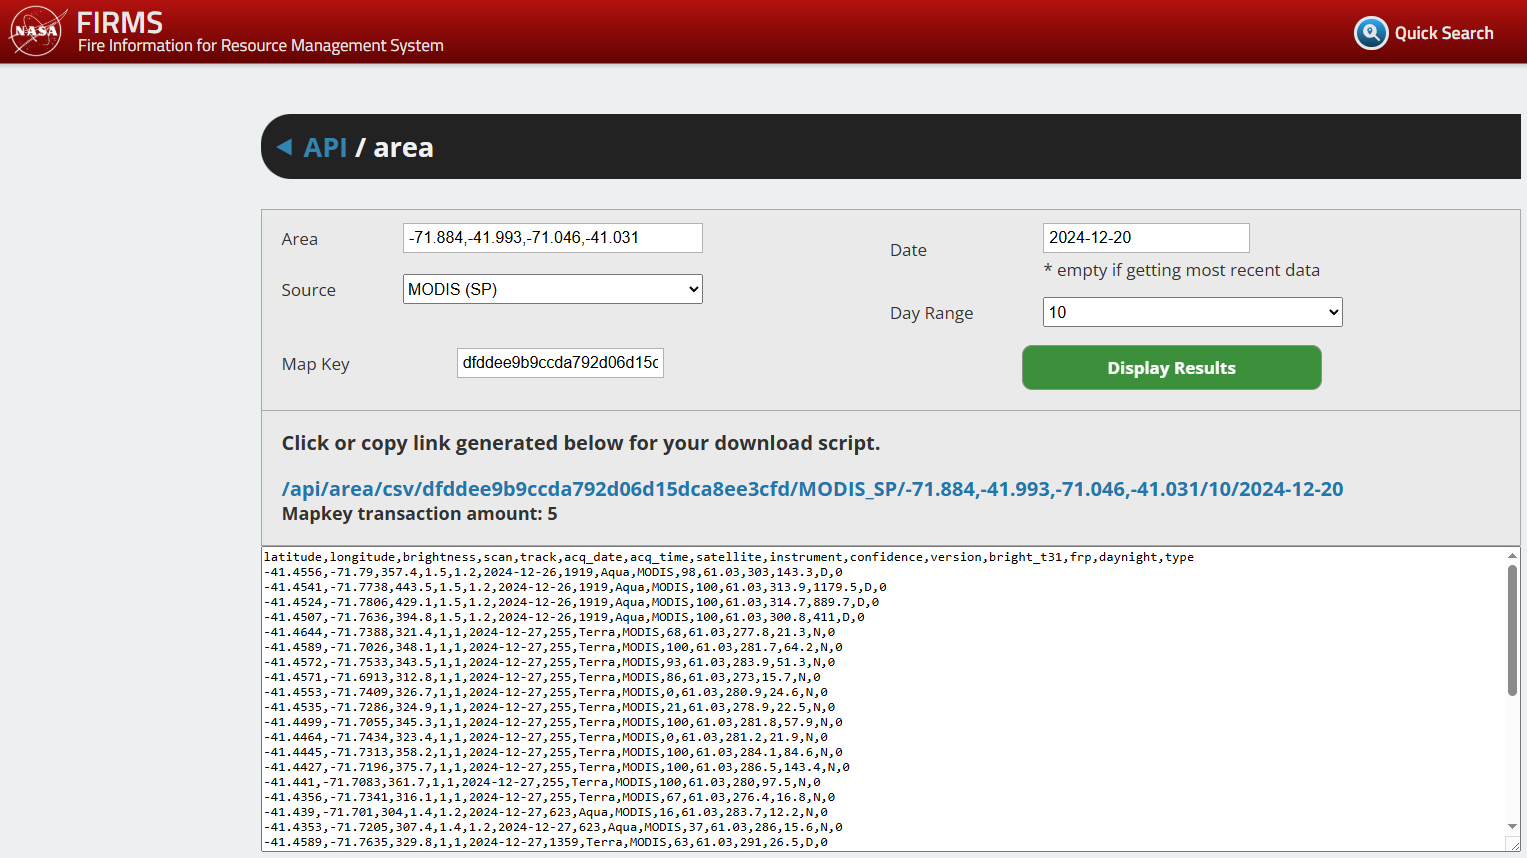

In [6]:
from firms_tools import FIRMSTools
import geopandas as gpd
from shapely.geometry import Point

firms = FIRMSTools(cfg)

# Descargar datos
print("Descargando datos de FIRMS...")
# df_data = firms.download_fire_data(source = 'MODIS_SP')

raw_data = firms.get_multisource_fire_data()

# if raw_data is not None and not raw_data.empty:
#     print(f"✓ Datos descargados exitosamente: {len(raw_data)} registros")
#     print(f"Columnas: {list(raw_data.columns)}")
    
#     # Procesar datos
#     processed_data = firms.process_fire_data(raw_data)
#     print(f"Datos procesados: {len(processed_data)} registros")
    
#     # Mostrar información básica
#     print(f"\n📊 Resumen de datos:")
#     print(f"Rango temporal: {processed_data['acq_date'].min()} to {processed_data['acq_date'].max()}")
#     print(f"Número de días con datos: {processed_data['acq_date'].nunique()}")
    
#     if 'confidence' in processed_data.columns:
#         print(f"Distribución de confianza:")
#         print(processed_data['confidence'].value_counts())
    
#     # Visualización rápida
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
#     # Distribución temporal
#     daily_counts = processed_data['acq_date'].value_counts().sort_index()
#     daily_counts.plot(ax=ax1, kind='bar', title='Detecciones por día')
#     ax1.tick_params(axis='x', rotation=45)
    
#     # Mapa de detecciones
#     geometry = [Point(xy) for xy in zip(processed_data.longitude, processed_data.latitude)]
#     gdf = gpd.GeoDataFrame(processed_data, geometry=geometry, crs="EPSG:4326")
    
#     # Cargar mapa base de Argentina
#     world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
#     argentina = world[world.NAME == 'Argentina']
    
#     argentina.plot(ax=ax2, color='lightgray', edgecolor='black')
#     gdf.plot(ax=ax2, color='red', markersize=10, alpha=0.7, label='Detecciones')
#     ax2.set_title('Ubicación de detecciones de incendios')
#     ax2.legend()
    
#     plt.tight_layout()
#     plt.show()
# else:
#     print("❌ No se pudieron obtener datos. Revisa los logs para más detalles.")

Descargando datos de FIRMS...


In [ ]:
import logging
from spatial_analysis import SpatialAnalysis

# Configuración
logging.basicConfig(level=logging.INFO)
plt.style.use('ggplot')

# Cargar datos
print("📊 Cargando datos de incendios...")
fire_data = pd.read_csv('../data/raw/firms/firms_MODIS_SP_2024-12-20_2024-12-29.csv')

# Mostrar información básica
print(f"Total de detecciones: {len(fire_data)}")
print(f"Rango temporal: {fire_data['acq_date'].min()} to {fire_data['acq_date'].max()}")
print(f"Columnas disponibles: {list(fire_data.columns)}")

# Inicializar análisis espacial
print("\n🔍 Iniciando análisis espacial...")
spatial_analyzer = SpatialAnalysis(fire_data)

# 1. Crear GeoDataFrame
gdf = spatial_analyzer.create_geodataframe()
print(f"GeoDataFrame creado: {len(gdf)} features")

# 2. Calcular estadísticas básicas
stats = spatial_analyzer.calculate_basic_stats()
print("\n📈 Estadísticas espaciales:")
for key, value in stats.items():
    print(f"{key}: {value}")

# 3. Visualización estática
print("\n🎨 Generando visualizaciones...")
spatial_analyzer.plot_spatial_distribution(save_path = f'{cfg.DATA_PROCESSED}/spatial_analysis.png')

# 4. Análisis de clusters
print("\n📊 Analizando clusters espaciales...")
cluster_stats = spatial_analyzer.cluster_analysis()
print("Estadísticas por cluster:")
print(cluster_stats)

# 5. Mapa interactivo (opcional - requiere folium)
try:
    print("\n🌍 Creando mapa interactivo...")
    interactive_map = spatial_analyzer.plot_interactive_map(save_path=f'{cfg.DATA_PROCESSED}/interactive_map.html')
    print("Mapa interactivo guardado como 'interactive_map.html'")
except ImportError:
    print("Folium no instalado. Instala con: pip install folium")

# 6. Exportar resultados
print("\n💾 Exportando resultados...")
spatial_analyzer.export_results(f"{cfg.DATA_PROCESSED}")
print("Análisis completado! ✅")

# Análisis adicional por día/noche
print("\n🌙 Análisis día vs noche:")
day_night_stats = gdf.groupby('daynight').agg({
    'frp': ['mean', 'sum', 'count'],
    'confidence': 'mean',
    'brightness': 'mean'
}).round(2)
print(day_night_stats)

# Análisis por satélite
print("\n🛰️ Análisis por satélite:")
satellite_stats = gdf.groupby('satellite').agg({
    'frp': ['mean', 'sum', 'count'],
    'confidence': 'mean'
}).round(2)
print(satellite_stats)